In [5]:
# !pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.8/744.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 735.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

## Custom Training

In [6]:
# %cd inside of the directory which has data (inside is train , valid, test) and data.yaml
%cd /content/drive/MyDrive/Data

!yolo task=detect mode=train model=yolov8m.pt data=data.yaml epochs=100 imgsz=224 plots=True

/content/drive/MyDrive/Data
100% 49.7M/49.7M [00:00<00:00, 148MB/s]
Ultralytics YOLOv8.1.40 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

## Validate the trained Model

In [8]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Data/runs/detect/train2/weights/best.pt data=data.yaml

Ultralytics YOLOv8.1.41 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/Data/valid/labels.cache... 325 images, 4 backgrounds, 0 corrupt: 100% 325/325 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [01:30<00:00,  4.31s/it]
                   all        325        757      0.952      0.839      0.888      0.667
               no-mask        325        307      0.961      0.928      0.949      0.795
                  mask        325        450      0.943      0.749      0.828      0.539
Speed: 0.3ms preprocess, 248.9ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


view  the cocnfusion matrix

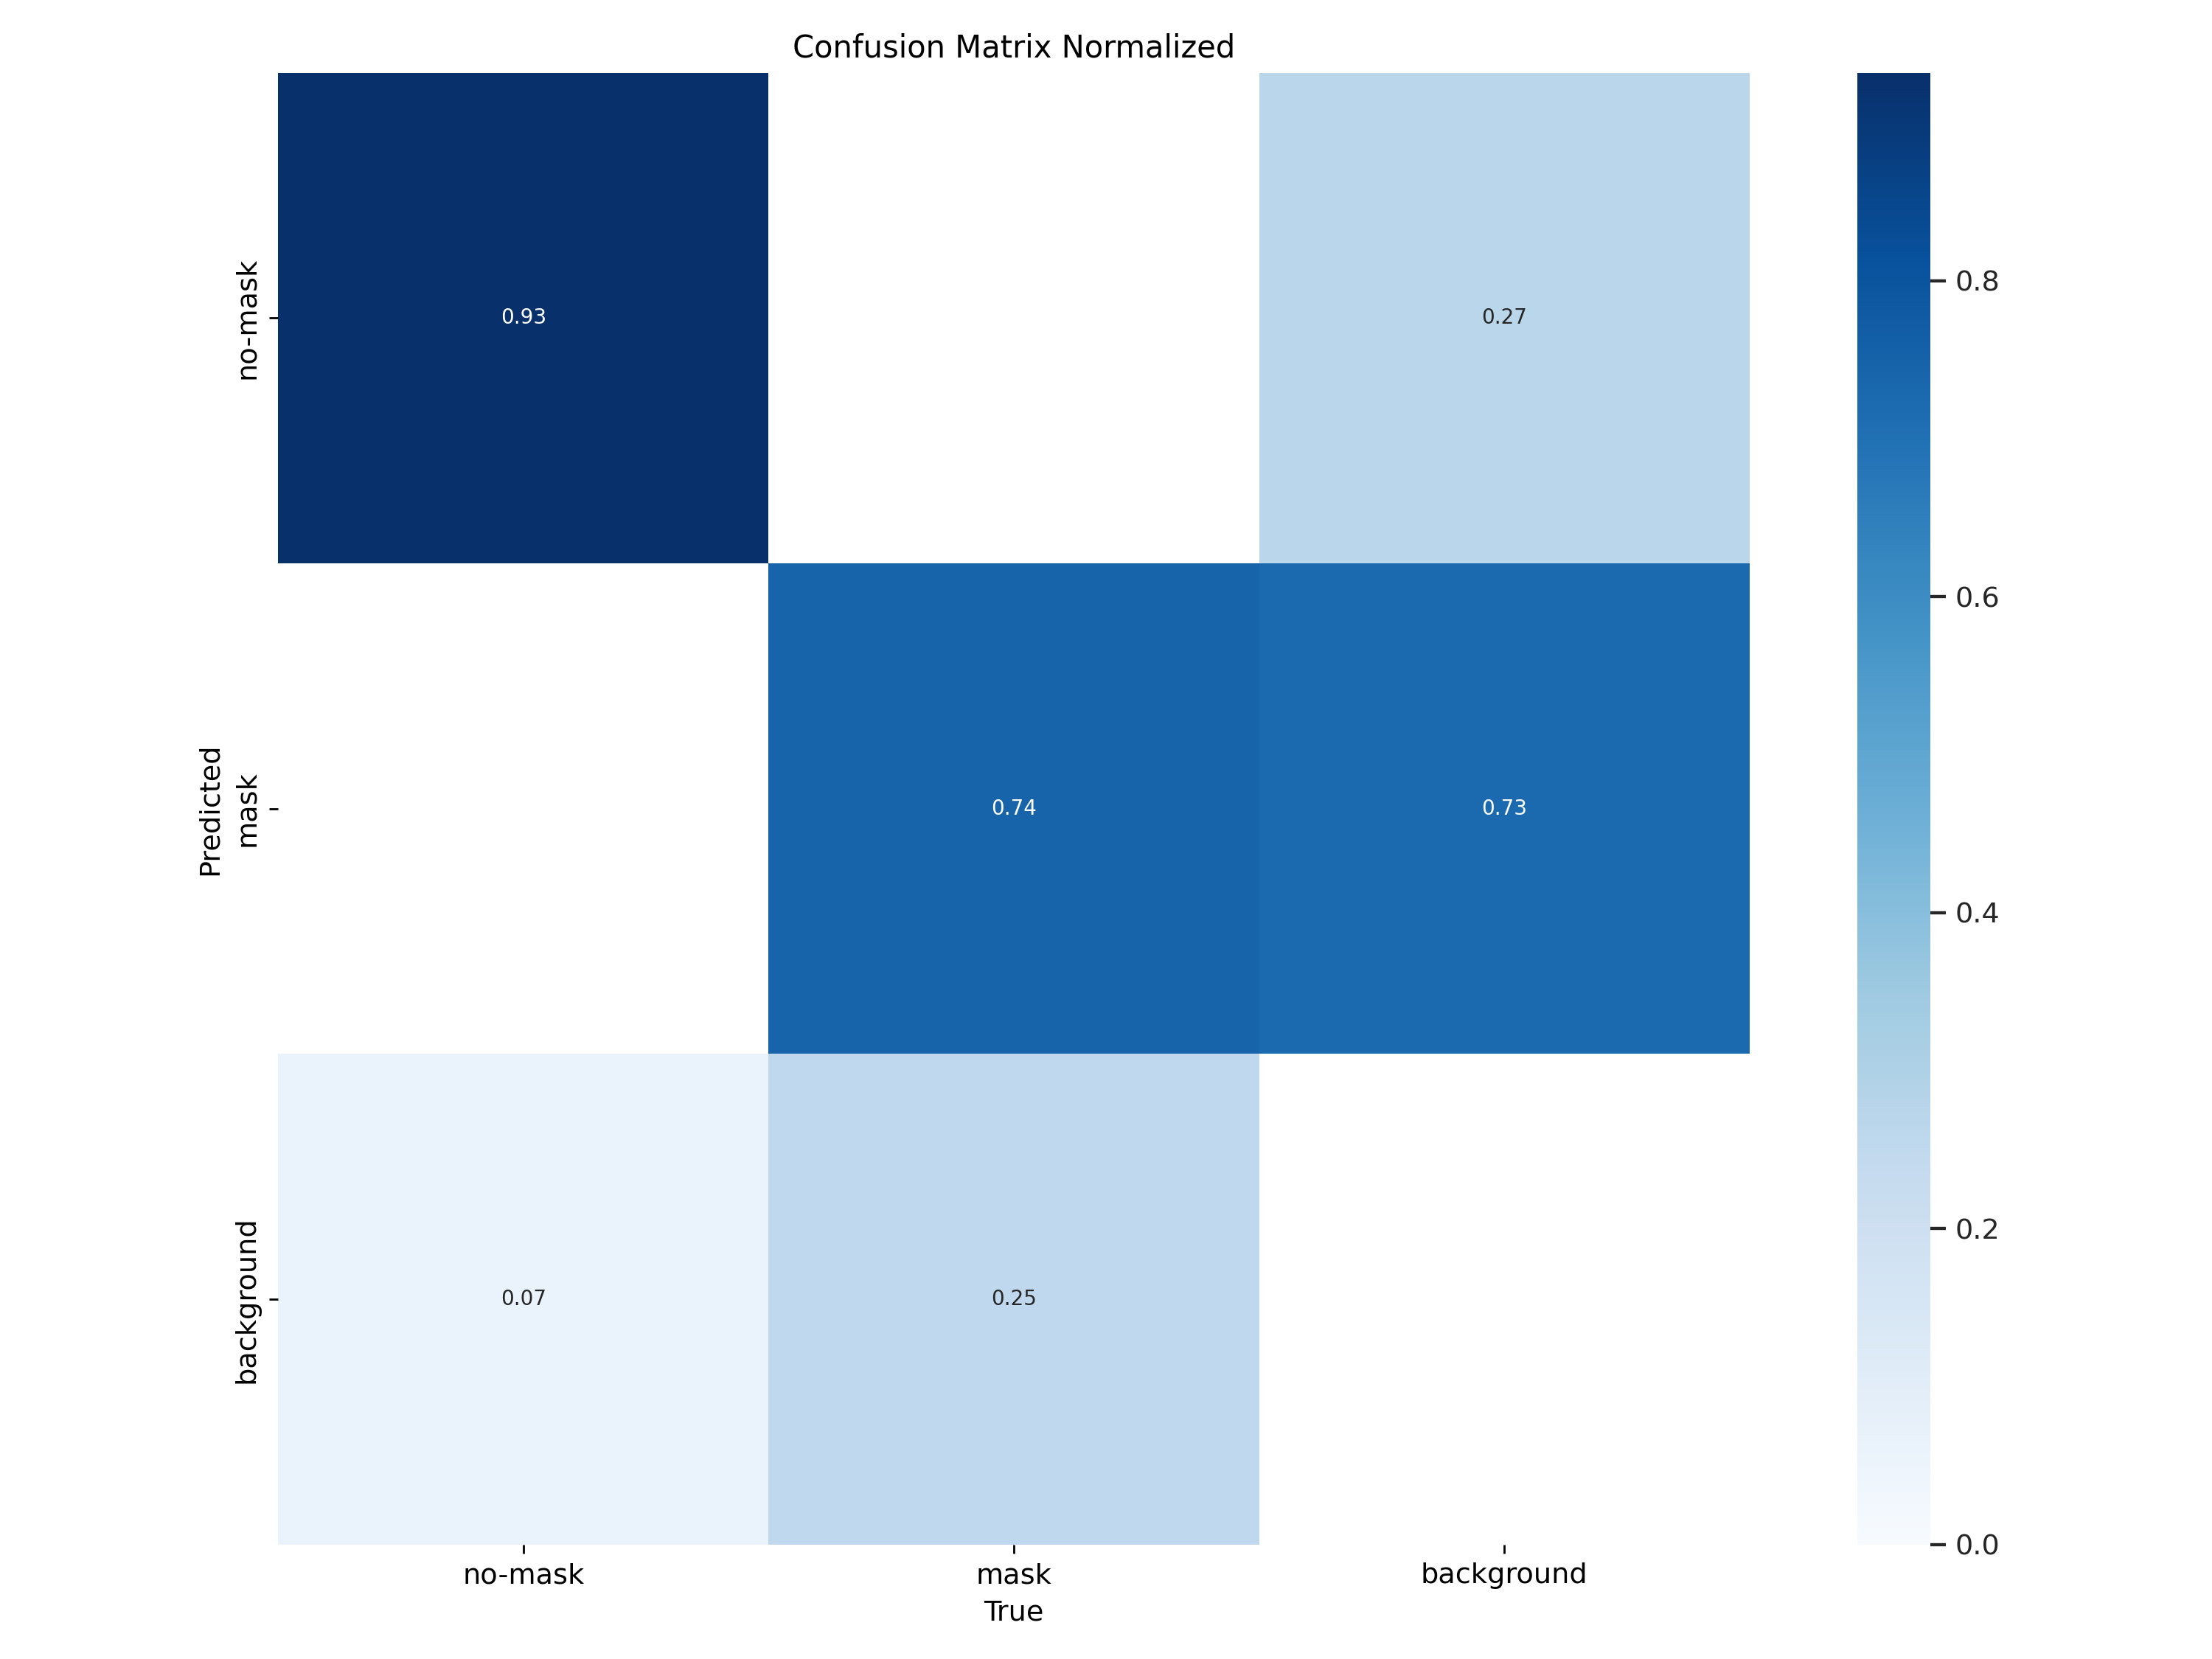

In [9]:
from IPython.display import display, Image
Image(filename='/content/drive/MyDrive/Data/runs/detect/train2/confusion_matrix_normalized.png', width=600)

View Curves

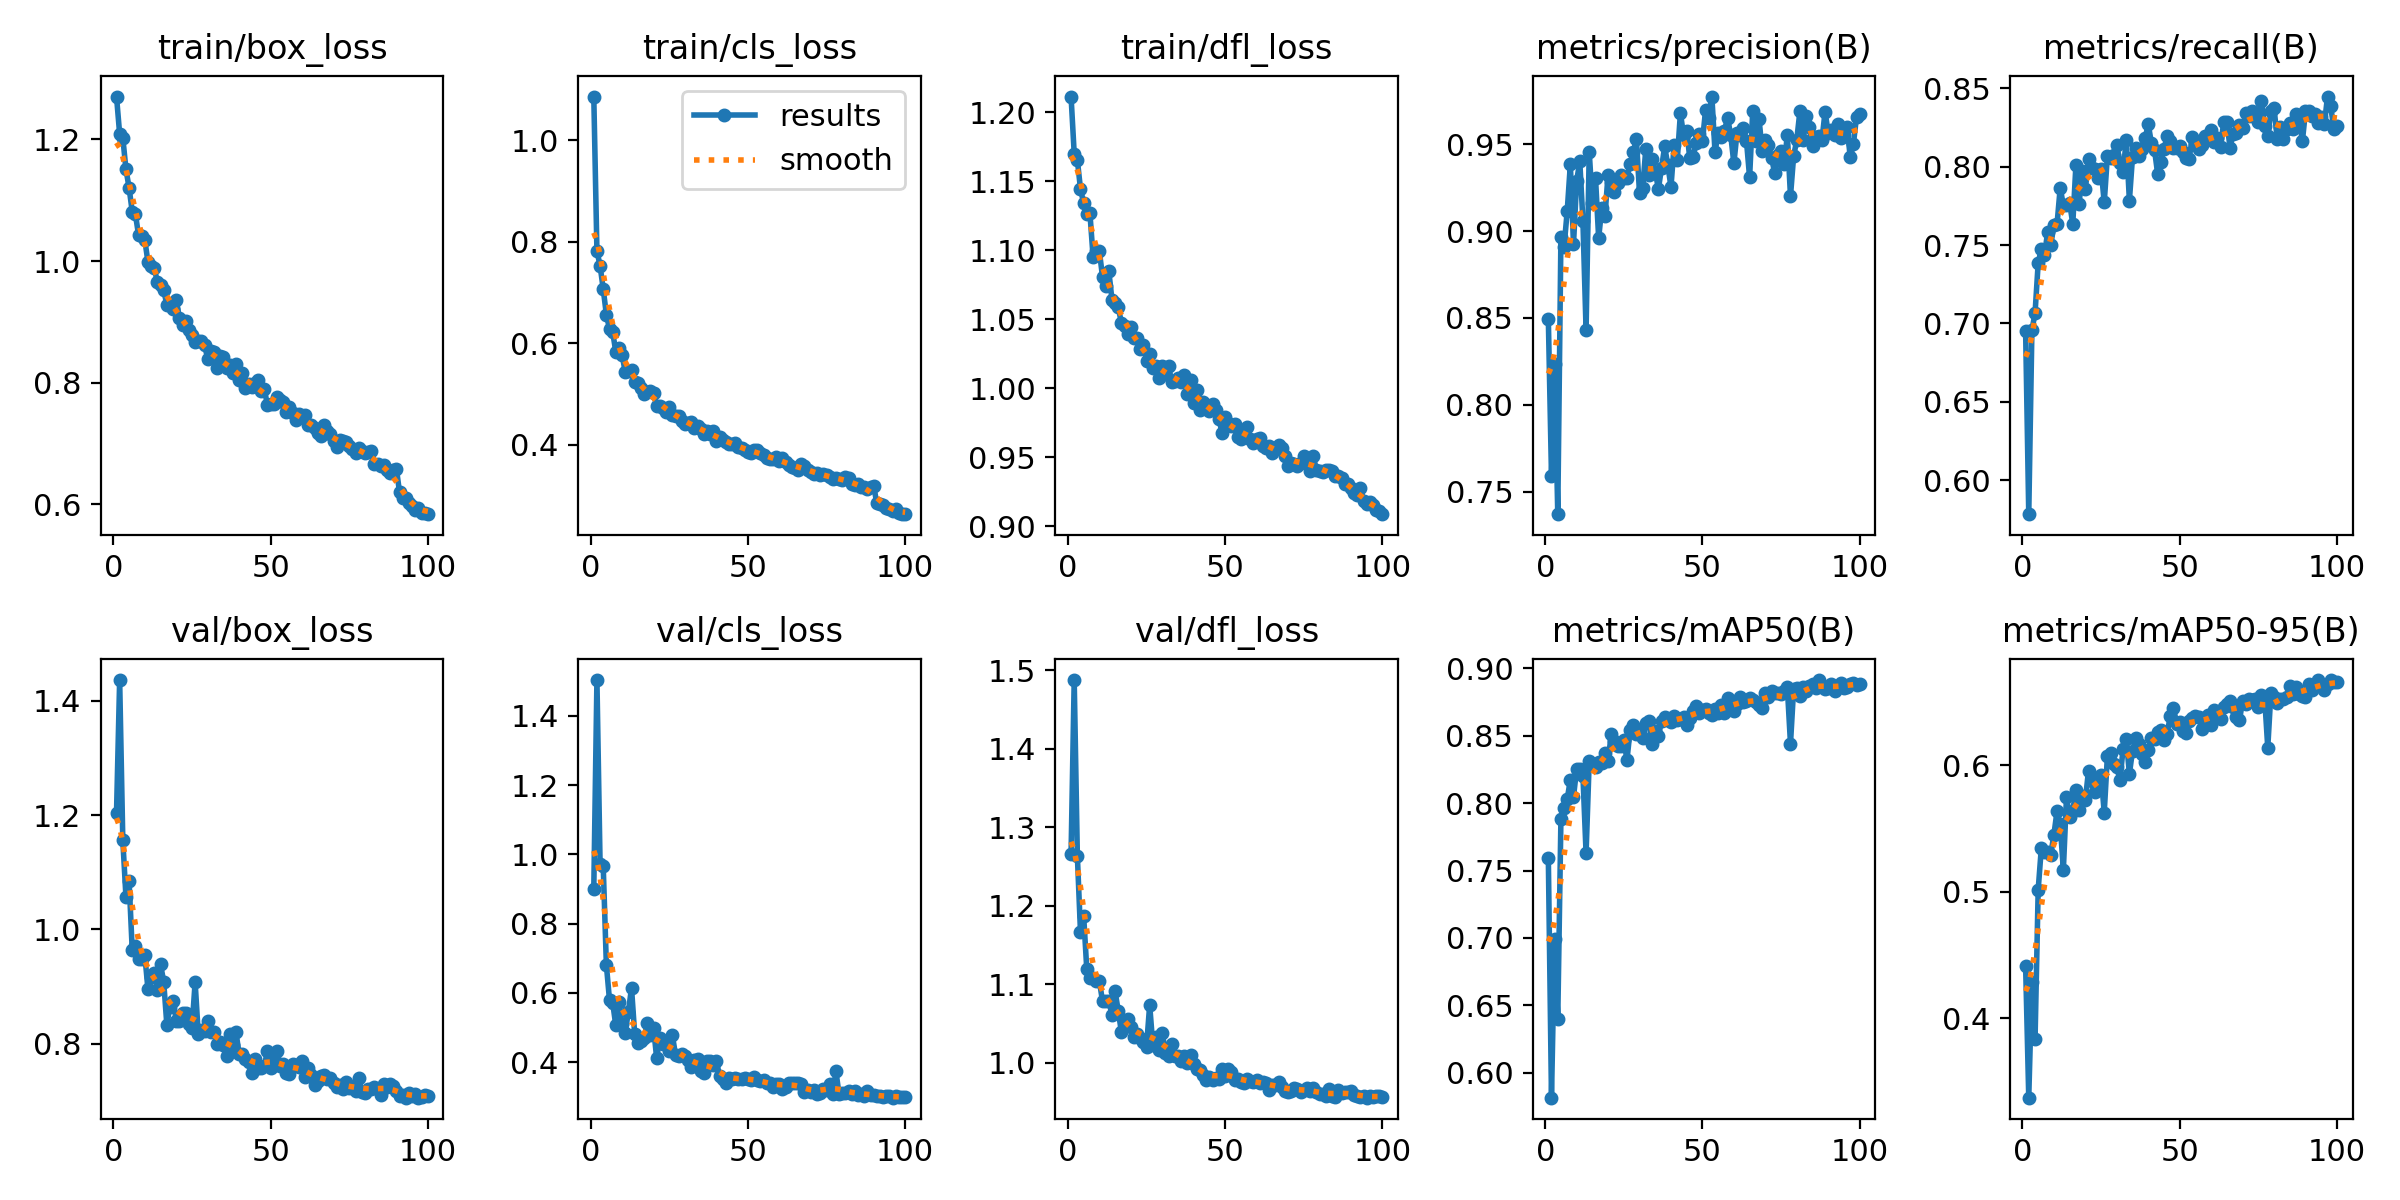

In [10]:
Image(filename='/content/drive/MyDrive/Data/runs/detect/train2/results.png', width=600)

View predictions on validation data

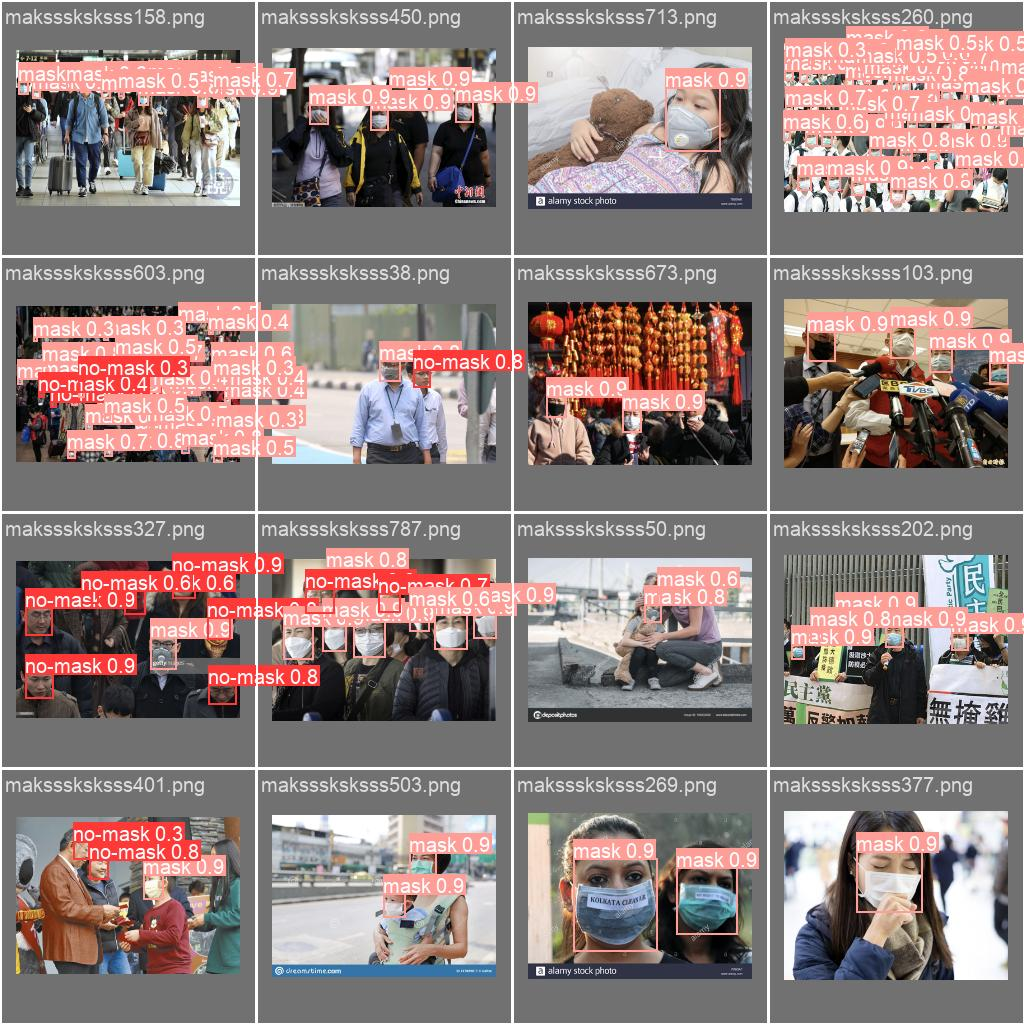

In [12]:
Image(filename='/content/drive/MyDrive/Data/runs/detect/train2/val_batch1_pred.jpg', width=600)

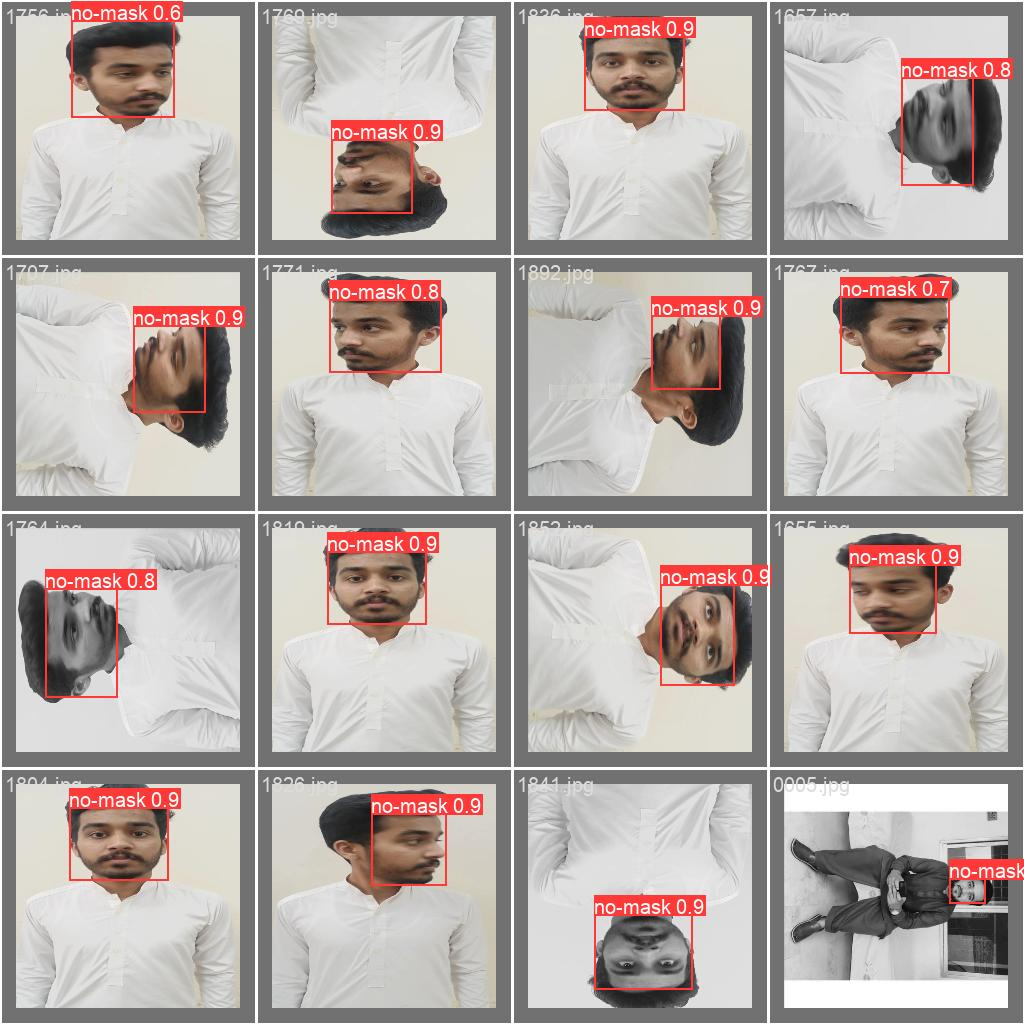

In [13]:
Image(filename='/content/drive/MyDrive/Data/runs/detect/train2/val_batch2_pred.jpg', width=600)

## **Inference the model on unknown (test) data**

In [14]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Data/runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Data/test/images

Ultralytics YOLOv8.1.41 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/323 /content/drive/MyDrive/Data/test/images/0004.jpg: 224x224 1 no-mask, 233.5ms
image 2/323 /content/drive/MyDrive/Data/test/images/0013.jpg: 224x224 3 no-masks, 196.7ms
image 3/323 /content/drive/MyDrive/Data/test/images/0034.jpg: 224x224 1 no-mask, 196.0ms
image 4/323 /content/drive/MyDrive/Data/test/images/0052.jpg: 224x224 1 no-mask, 422.5ms
image 5/323 /content/drive/MyDrive/Data/test/images/0059.jpg: 224x224 1 no-mask, 326.0ms
image 6/323 /content/drive/MyDrive/Data/test/images/0062.jpg: 224x224 3 no-masks, 334.7ms
image 7/323 /content/drive/MyDrive/Data/test/images/0063.jpg: 224x224 3 no-masks, 329.9ms
image 8/323 /content/drive/MyDrive/Data/test/images/0079.jpg: 224x224 1 no-mask, 360.2ms
image 9/323 /content/drive/MyDrive/Data/test/images/0089.jpg: 224x224 2 no-masks, 349.8ms
image 10/323 /content/drive/M